In [ ]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import keras

Firstly, you have to upload the data file to your google drive and mount the drive.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Import the files


## Copy and Paste the path of the neg folder containing negative reviews.
# Do the same for pos folder that contains the positive reviews.

In [ ]:

import string
import re
from pathlib import Path

neg = "/content/gdrive/MyDrive/data/data/neg"
neg_review = []
neg_sentiment = []
reviews = Path(neg).glob('*')
for review in reviews:
  with open(review) as f:
    text = f.read()
    # removing punctuations in each reviews
    remove_punc = re.sub(r'[^\w\s]', '', text)
     # removing numbers from the reviews
    remove_numbers = re.sub(r'[0-9]+', '', remove_punc)
    line_split = remove_numbers.replace('\n', ' ')
    # Appending to the list
    neg_review.append(line_split)
    # Using binary encoding of 0 and 1.
    neg_sentiment.append(0)

In [ ]:
neg_review[2]

'it is movies like these that make a jaded movie viewer thankful for the invention of the timex indiglo watch   based on the late s television show by the same name  the mod squad tells the tale of three reformed criminals under the employ of the police to go undercover   however  things go wrong as evidence gets stolen and they are immediately under suspicion   of course  the ads make it seem like so much more   quick cuts  cool music  claire danes nice hair and cute outfits  car chases  stuff blowing up  and the like   sounds like a cool movie  does it not   after the first fifteen minutes  it quickly becomes apparent that it is not   the mod squad is certainly a slick looking production  complete with nice hair and costumes  but that simply isnt enough   the film is best described as a cross between an hourlong cop show and a music video  both stretched out into the span of an hour and a half   and with it comes every single clich    it doesnt really matter that the film is based on

In [ ]:
neg_sentiment[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
print(len(neg_sentiment))

1000


In [ ]:
words = neg_review[2].split()
print(len(words))

483


## Getting the review lengths

In [ ]:
# Putting the length of the words in a list also.
neg_review_word_length = []
for review in neg_review :
  words = review.split()
  words_len = len(words)
  neg_review_word_length.append(words_len)
print(neg_review_word_length)

[688, 240, 483, 462, 718, 651, 540, 559, 697, 753, 711, 529, 451, 920, 488, 598, 636, 681, 435, 716, 666, 524, 654, 1076, 701, 560, 484, 1271, 505, 312, 483, 825, 1252, 518, 498, 525, 307, 513, 687, 642, 260, 553, 492, 280, 494, 576, 703, 709, 376, 646, 537, 472, 353, 1101, 643, 436, 465, 195, 252, 323, 484, 1125, 561, 716, 565, 952, 619, 620, 435, 630, 871, 745, 727, 650, 506, 340, 292, 600, 595, 1121, 449, 270, 396, 862, 475, 528, 819, 667, 305, 543, 1147, 423, 560, 199, 676, 398, 473, 1035, 384, 602, 1745, 722, 490, 759, 289, 769, 324, 1812, 563, 526, 325, 928, 588, 631, 237, 658, 441, 339, 747, 336, 725, 315, 1246, 526, 742, 535, 620, 577, 301, 313, 354, 1155, 269, 349, 764, 558, 737, 523, 1149, 784, 1509, 1313, 438, 485, 645, 769, 655, 648, 660, 510, 496, 421, 502, 352, 789, 480, 423, 470, 533, 302, 363, 795, 648, 708, 540, 296, 839, 422, 371, 459, 734, 242, 952, 264, 535, 597, 508, 170, 524, 597, 557, 403, 721, 642, 399, 503, 700, 903, 601, 476, 732, 589, 880, 403, 446, 589, 273,

In [ ]:
print(len(neg_review_word_length))

1000


Positive reviews folder

In [ ]:
pos = "/content/gdrive/MyDrive/data/data/pos"
pos_review = []
pos_sentiment = []
reviews = Path(pos).glob('*')
for review in reviews:
  with open(review) as f:
    text = f.read()
    # removing punctuations in each reviews
    remove_punc = re.sub(r'[^\w\s]', '', text)
     # removing numbers from the reviews
    remove_numbers = re.sub(r'[0-9]+', '', remove_punc)
    line_split = remove_numbers.replace('\n', ' ')
    # Appending to the list
    pos_review.append(line_split)
    pos_sentiment.append(1)

In [ ]:
pos_review[1]

'every now and then a movie comes along from a suspect studio  with every indication that it will be a stinker  and to everybodys surprise  perhaps even the studio  the film becomes a critical darling   mtv films _election  a high school comedy starring matthew broderick and reese witherspoon  is a current example   did anybody know this film existed a week before it opened   the plot is deceptively simple   george washington carver high school is having student elections   tracy flick  reese witherspoon  is an overachiever with her hand raised at nearly every question  way  way  high   mr   m   matthew broderick   sick of the megalomaniac student  encourages paul  a popularbutslow jock to run   and pauls nihilistic sister jumps in the race as well  for personal reasons   the dark side of such sleeper success is that  because expectations were so low going in  the fact that this was quality stuff made the reviews even more enthusiastic than they have any right to be   you cant help goi

In [ ]:
pos_sentiment[:20]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
# Putting the length of the words in a list also.
pos_review_word_length = []
for review in pos_review :
  words = review.split()
  words_len = len(words)
  pos_review_word_length.append(words_len)
print(pos_review_word_length)

[679, 650, 416, 997, 644, 855, 782, 593, 251, 418, 828, 686, 302, 286, 1115, 571, 411, 831, 466, 506, 324, 611, 468, 753, 899, 741, 517, 1123, 982, 1147, 845, 1238, 832, 1092, 616, 474, 393, 829, 333, 531, 669, 1057, 731, 522, 737, 781, 822, 621, 588, 362, 393, 568, 301, 858, 486, 690, 447, 164, 218, 854, 958, 616, 1054, 283, 687, 798, 482, 511, 740, 599, 539, 458, 906, 643, 1384, 247, 1121, 579, 528, 343, 446, 573, 317, 795, 692, 711, 954, 966, 637, 361, 323, 433, 729, 343, 591, 507, 733, 676, 402, 915, 550, 765, 645, 702, 508, 1099, 612, 497, 308, 647, 920, 255, 933, 798, 243, 1161, 924, 685, 673, 342, 870, 656, 1341, 1323, 641, 453, 718, 579, 404, 420, 374, 867, 320, 560, 708, 430, 871, 401, 522, 433, 883, 688, 663, 1101, 355, 255, 1844, 839, 555, 473, 488, 585, 368, 800, 726, 654, 422, 301, 961, 673, 621, 273, 1532, 1275, 598, 947, 835, 632, 468, 936, 301, 656, 520, 357, 551, 520, 405, 772, 723, 459, 559, 563, 615, 626, 252, 571, 669, 497, 396, 615, 536, 487, 540, 497, 439, 499, 66

In [ ]:
print(len(pos_sentiment))

1000


In [ ]:
total_reviews_train = neg_review[:700] + pos_review[:700]
total_sentiment_train = neg_sentiment[:700] + pos_sentiment[:700]
total_words_count_train= neg_review_word_length[:700] + pos_review_word_length[:700]

In [ ]:
total_reviews_test = neg_review[700:] + pos_review[700:]
total_sentiment_test = neg_sentiment[700:] + pos_sentiment[700:]
total_words_count_test = neg_review_word_length[700:] + pos_review_word_length[700:]

## Creating Dataset For Training Reviews, Testing Reviews and All the Reviews.

In [ ]:
import pandas as pd

dict_train = {'review':total_reviews_train, 'sentiment':total_sentiment_train, "review_length":total_words_count_train}
review_set_train = pd.DataFrame(dict_train)
review_set_train

,review,sentiment,review_length
0,plot two teen couples go to a church party d...,0,688
1,the happy bastards quick movie review damn th...,0,240
2,it is movies like these that make a jaded movi...,0,483
3,quest for camelot is warner bros first fe...,0,462
4,synopsis a mentally unstable man undergoing p...,0,718
...,...,...,...
1395,who would have thought jim carrey does drama...,1,714
1396,capsule this is a harrowing look at a rarely ...,1,749
1397,another independent film this comedy which w...,1,532
1398,a frequent error is the categorization of a te...,1,1247


In [ ]:
# shuffling the dataset
shuffled_reviews_train = review_set_train.sample(frac=1, random_state=2)
shuffled_reviews_train

,review,sentiment,review_length
932,last night could have an aka tagged on th...,1,674
71,theres a foot tidal wave at the end of deep ...,0,745
1364,if youve ever perused my college comedy diary ...,1,582
600,silly performances and some huge gaps in logic...,0,281
1194,i want to correct what i wrote in a former ret...,1,522
...,...,...,...
466,running time approximately hr mins reviewed b...,0,429
299,mm written by seven scribe andrew kevin walke...,0,601
493,to sum the entire film up in one sentence ...,0,532
527,woody allen is one of the most successful arti...,0,733


In [ ]:
dict_test = {'review':total_reviews_test, 'sentiment':total_sentiment_test, "review_length":total_words_count_test}
review_set_test = pd.DataFrame(dict_test)
review_set_test

,review,sentiment,review_length
0,the beach is a structurally confusing film ...,0,567
1,the most absurd remake of its a toss up bet...,0,588
2,in the surprise success an unheralded little...,0,419
3,these days we are witnessing the deluge of fi...,0,441
4,after s falling down i hoped that joel schu...,0,559
...,...,...,...
595,wow what a movie its everything a movie can...,1,760
596,richard gere can be a commanding actor but he...,1,320
597,glorystarring matthew broderick denzel washin...,1,1050
598,steven spielbergs second epic film on world wa...,1,583


In [ ]:
# shuffling the dataset
shuffled_reviews_test = review_set_test.sample(frac=1, random_state=2)
shuffled_reviews_test

,review,sentiment,review_length
449,meet joe black is your classic boymeetsgirl b...,1,570
141,a movie about divorce and custody in seems ab...,0,669
131,one of the most blatantly obvious signs that o...,0,832
311,in the sweet hereafter writerdirector atom ...,1,1081
176,a life less ordinary r while the extremely p...,0,697
...,...,...,...
534,not too many people know who james whale is b...,1,476
584,now that boogie nights has made disco respec...,1,538
493,let me open this one with a confession i love...,1,1377
527,tibet has entered the american consciousness s...,1,792


In [ ]:
total_reviews = neg_review + pos_review
total_sentiment = neg_sentiment + pos_sentiment
total_words_count = neg_review_word_length + pos_review_word_length

In [ ]:
# Average review length
average = sum(total_words_count) / len(total_words_count)
print(average)

644.3575


In [ ]:
dict_full = {'review':total_reviews, 'sentiment':total_sentiment, "review_length":total_words_count}
review_set = pd.DataFrame(dict_full)
review_set

,review,sentiment,review_length
0,plot two teen couples go to a church party d...,0,688
1,the happy bastards quick movie review damn th...,0,240
2,it is movies like these that make a jaded movi...,0,483
3,quest for camelot is warner bros first fe...,0,462
4,synopsis a mentally unstable man undergoing p...,0,718
...,...,...,...
1995,wow what a movie its everything a movie can...,1,760
1996,richard gere can be a commanding actor but he...,1,320
1997,glorystarring matthew broderick denzel washin...,1,1050
1998,steven spielbergs second epic film on world wa...,1,583


In [ ]:
# shuffling the dataset
shuffled_reviews = review_set.sample(frac=1, random_state=2)
shuffled_reviews

,review,sentiment,review_length
278,it would be hard to choose the best american p...,0,702
492,the new austin powers film continues a movie t...,0,439
1266,its ironic that the best films in cinema histo...,1,577
557,i wont even pretend that i have seen the other...,0,700
871,paul verhoeven the dutch auteur who dragged h...,0,1319
...,...,...,...
1558,the endurance shackletons legendary antarct...,1,804
1608,magnolia left me relling from the theatre sta...,1,721
493,to sum the entire film up in one sentence ...,0,532
527,woody allen is one of the most successful arti...,0,733


In [ ]:
shuffled_reviews.describe()

,sentiment,review_length
count,2000.000000,2000.000000
mean,0.500000,644.357500
std,0.500125,285.051395
min,0.000000,16.000000
25%,0.000000,452.000000
50%,0.500000,602.000000
75%,1.000000,778.000000
max,1.000000,2363.000000


In [ ]:
average = sum(total_words_count) / len(total_words_count)
print(f'Average of reviews length = {average}')

Average of reviews length = 644.3575


### Standard deviation of Review lengths

In [ ]:
std = shuffled_reviews['review_length'].std()
print(f"The standard deviation of the review lenghts = {std}")

The standard deviation of the review lenghts = 285.05139508985275


# Plotting the lengths of Reviews in the whole Dattaset

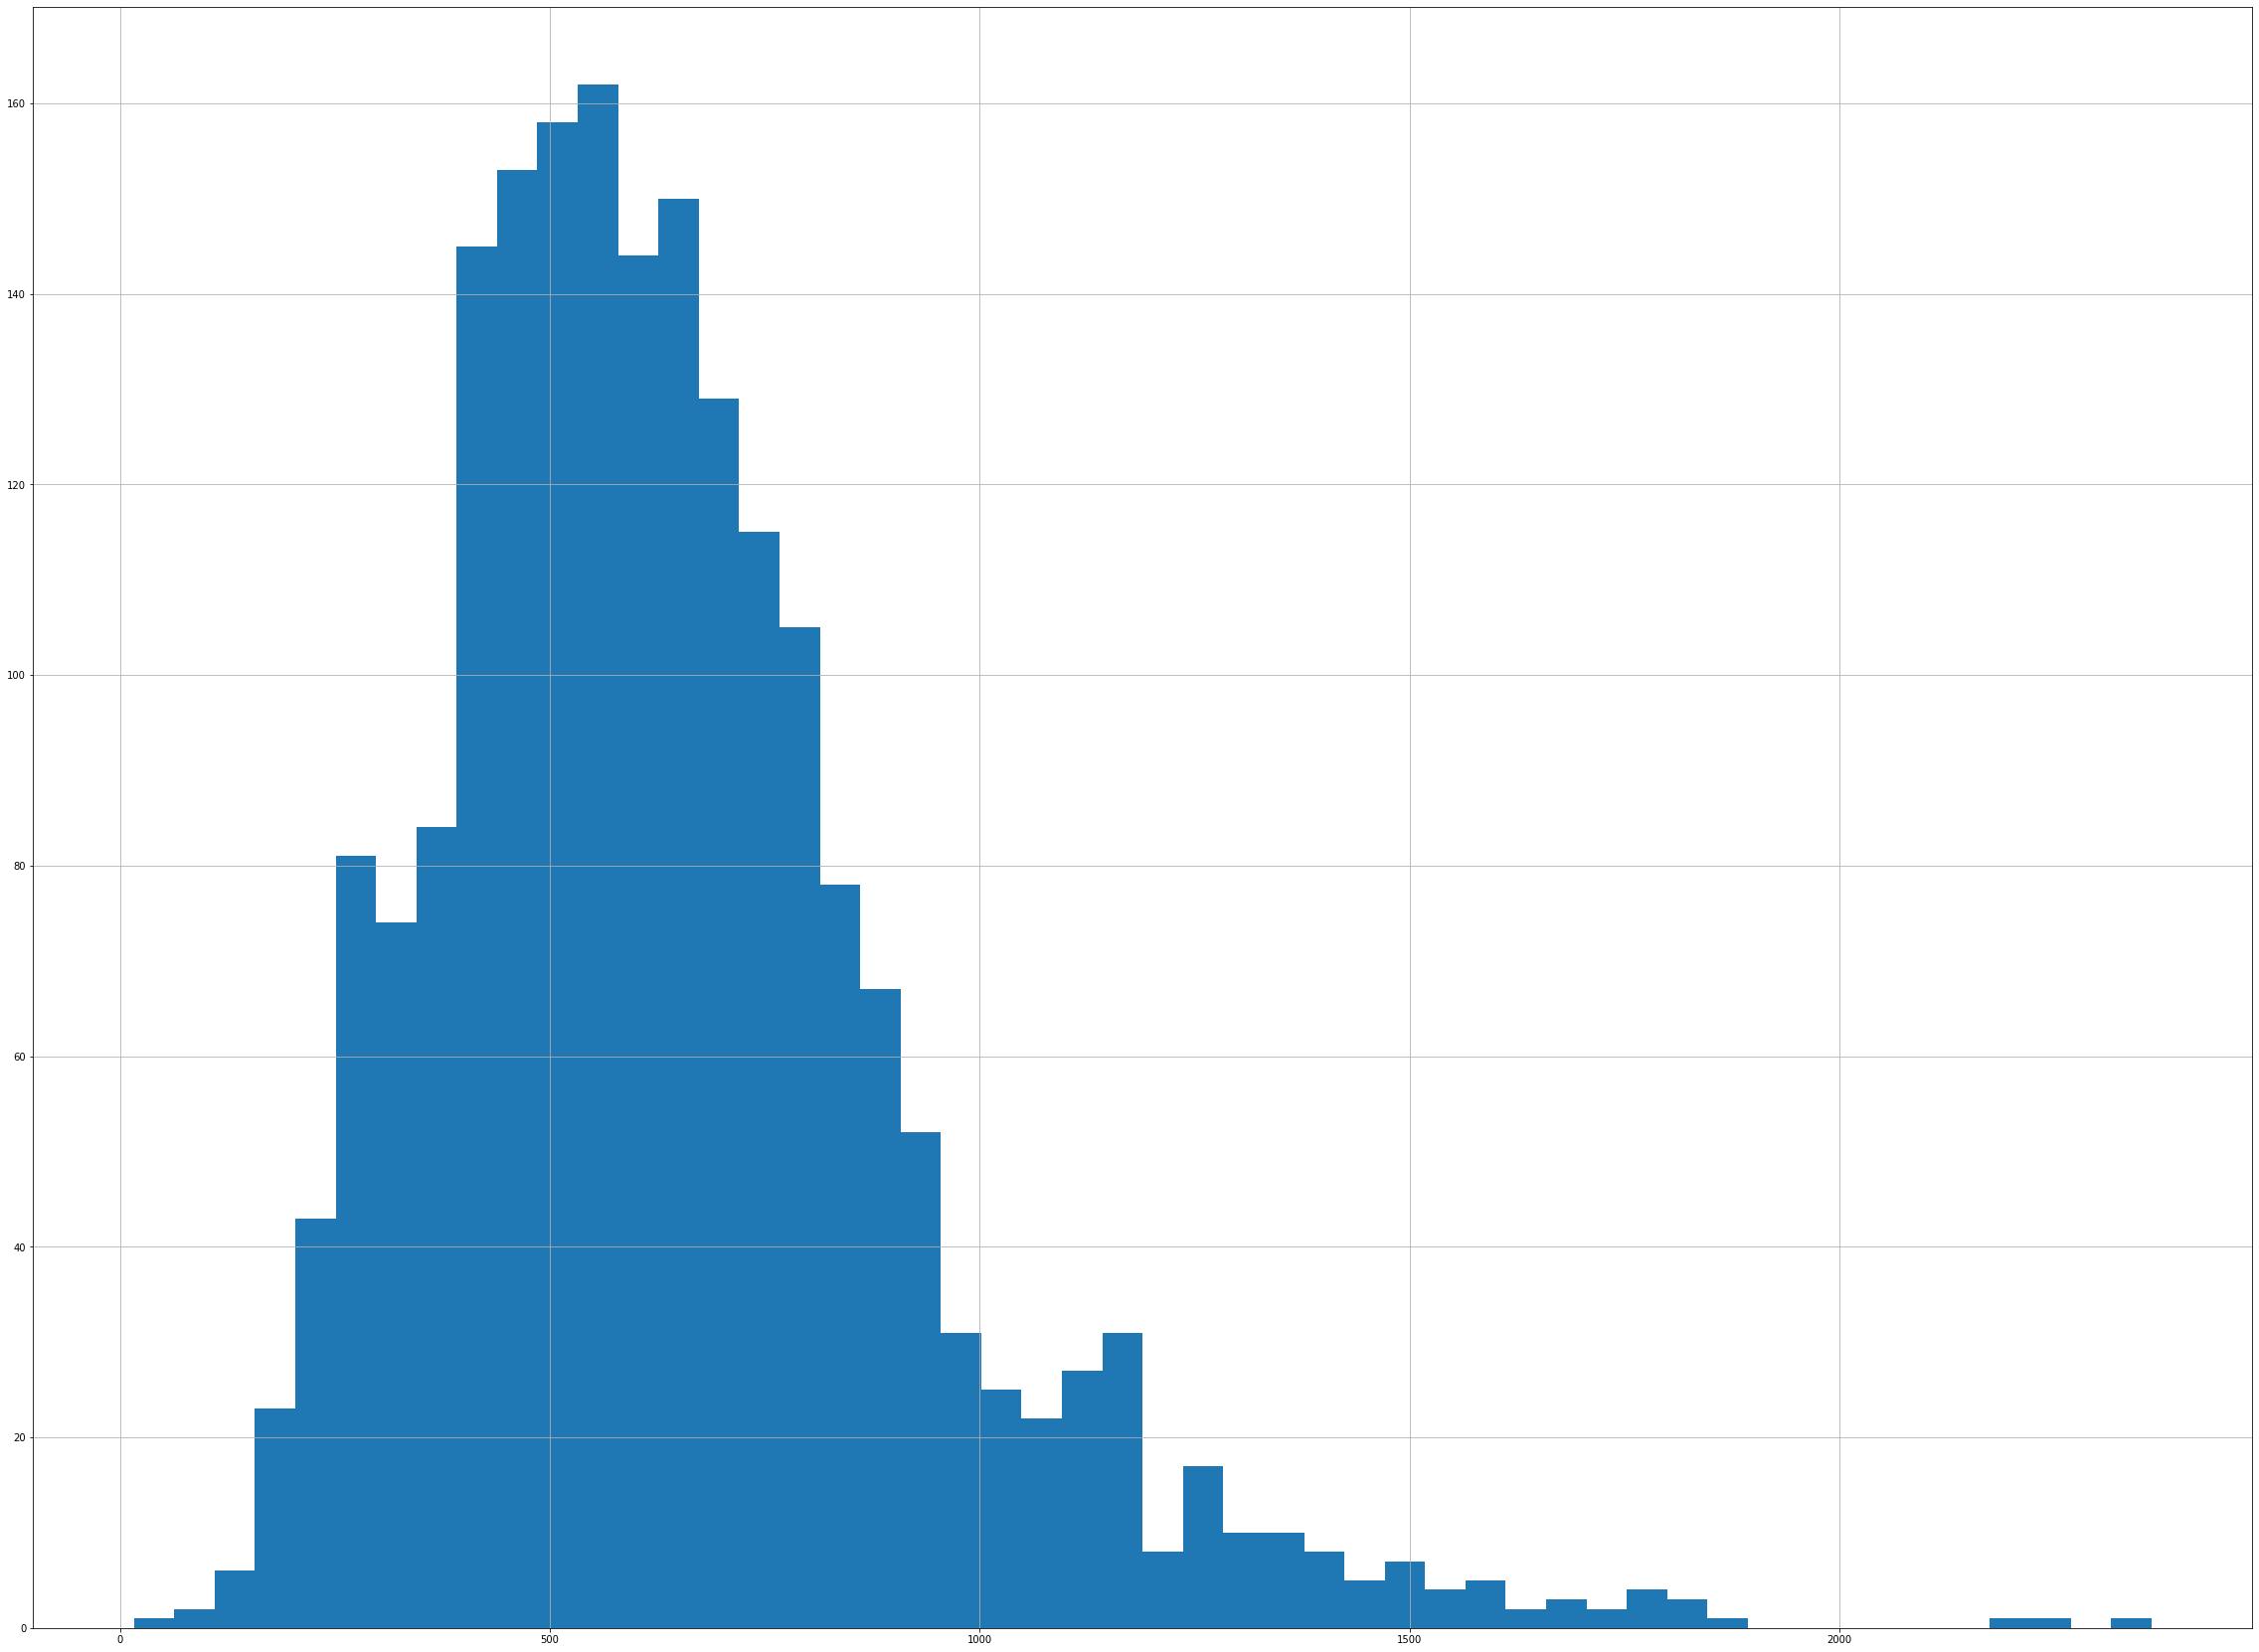

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram of review lengths 
review_length = shuffled_reviews['review_length']

review_length.hist(figsize=(40, 30), bins=50)

In [ ]:
full_set = neg_review + pos_review
print(len(full_set))

2000


In [ ]:
total_words = []
for reviews in full_set:
  words = reviews.split()
  for word in words:
    total_words.append(word)
  

In [ ]:
print(len(total_words))

1288715


## Getting The Unique Words in the Dataset

In [ ]:
# Checking for the unique words in all the words.
unique = []
for word in total_words:
    if word not in unique:
        unique.append(word)

In [ ]:
# number of unique words in the dataset

print(len(unique))

47037


# Counting the occurence of unique words in the dataset

In [ ]:
# Counting unique words in the full_set
word_counts = []
for word in unique :
  count = total_words.count(word)
  word_counts.append(count)

In [ ]:
unique[:20]

['plot',
 'two',
 'teen',
 'couples',
 'go',
 'to',
 'a',
 'church',
 'party',
 'drink',
 'and',
 'then',
 'drive',
 'they',
 'get',
 'into',
 'an',
 'accident',
 'one',
 'of']

In [ ]:
word_counts[:20]

[1451,
 1824,
 126,
 32,
 1075,
 31762,
 37963,
 67,
 176,
 32,
 35347,
 1407,
 95,
 4278,
 1921,
 2616,
 5736,
 100,
 5520,
 33971]

## Tagging Unique Words with number of Occurence in the Dataset

In [ ]:
unique_counts ={}
length = len(word_counts)
for i in range(length):
  unique_counts[unique[i]]=word_counts[i]
unique_counts

{'plot': 1451,
 'two': 1824,
 'teen': 126,
 'couples': 32,
 'go': 1075,
 'to': 31762,
 'a': 37963,
 'church': 67,
 'party': 176,
 'drink': 32,
 'and': 35347,
 'then': 1407,
 'drive': 95,
 'they': 4278,
 'get': 1921,
 'into': 2616,
 'an': 5736,
 'accident': 100,
 'one': 5520,
 'of': 33971,
 'the': 76291,
 'guys': 284,
 'dies': 105,
 'but': 8583,
 'his': 9568,
 'girlfriend': 195,
 'continues': 88,
 'see': 1730,
 'him': 2630,
 'in': 21595,
 'her': 4504,
 'life': 1469,
 'has': 4715,
 'nightmares': 26,
 'whats': 234,
 'deal': 218,
 'watch': 601,
 'movie': 5438,
 'sorta': 9,
 'find': 779,
 'out': 3441,
 'critique': 61,
 'mindfuck': 4,
 'for': 9914,
 'generation': 93,
 'that': 15109,
 'touches': 55,
 'on': 7249,
 'very': 1862,
 'cool': 196,
 'idea': 378,
 'presents': 78,
 'it': 12300,
 'bad': 1373,
 'package': 30,
 'which': 3155,
 'is': 25171,
 'what': 3076,
 'makes': 992,
 'this': 9564,
 'review': 293,
 'even': 2555,
 'harder': 33,
 'write': 113,
 'since': 768,
 'i': 7504,
 'generally': 103,

# Arranging  the Words and their Counts in Descending Order

In [ ]:
sorted_unique_counts = sorted(unique_counts.items(), key=lambda x:x[1], reverse = True)
sorted_unique_counts

[('the', 76291),
 ('a', 37963),
 ('and', 35347),
 ('of', 33971),
 ('to', 31762),
 ('is', 25171),
 ('in', 21595),
 ('that', 15109),
 ('it', 12300),
 ('as', 11343),
 ('with', 10779),
 ('for', 9914),
 ('his', 9568),
 ('this', 9564),
 ('film', 8859),
 ('but', 8583),
 ('he', 7611),
 ('i', 7504),
 ('on', 7249),
 ('are', 6944),
 ('by', 6218),
 ('be', 6082),
 ('its', 5989),
 ('an', 5736),
 ('not', 5521),
 ('one', 5520),
 ('movie', 5438),
 ('who', 5378),
 ('from', 4986),
 ('at', 4965),
 ('was', 4934),
 ('have', 4898),
 ('has', 4715),
 ('her', 4504),
 ('you', 4437),
 ('they', 4278),
 ('all', 4250),
 ('so', 3582),
 ('like', 3554),
 ('about', 3518),
 ('out', 3441),
 ('more', 3342),
 ('when', 3254),
 ('which', 3155),
 ('their', 3115),
 ('up', 3107),
 ('or', 3097),
 ('what', 3076),
 ('some', 2981),
 ('just', 2900),
 ('if', 2792),
 ('there', 2757),
 ('she', 2687),
 ('him', 2630),
 ('into', 2616),
 ('even', 2555),
 ('only', 2483),
 ('than', 2438),
 ('no', 2412),
 ('we', 2360),
 ('good', 2321),
 ('most

In [ ]:
sorted_unique_counts[0][0]

'the'

In [ ]:
len(unique) == len(sorted_unique_counts)

True

## Ranking Unique words according to Occurence in the whole Dataset

In [ ]:
rearranged_counts = {}
count = 1
for key in sorted_unique_counts:
  rearranged_counts[key[0]] = count
  count += 1
rearranged_counts

{'the': 1,
 'a': 2,
 'and': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'in': 7,
 'that': 8,
 'it': 9,
 'as': 10,
 'with': 11,
 'for': 12,
 'his': 13,
 'this': 14,
 'film': 15,
 'but': 16,
 'he': 17,
 'i': 18,
 'on': 19,
 'are': 20,
 'by': 21,
 'be': 22,
 'its': 23,
 'an': 24,
 'not': 25,
 'one': 26,
 'movie': 27,
 'who': 28,
 'from': 29,
 'at': 30,
 'was': 31,
 'have': 32,
 'has': 33,
 'her': 34,
 'you': 35,
 'they': 36,
 'all': 37,
 'so': 38,
 'like': 39,
 'about': 40,
 'out': 41,
 'more': 42,
 'when': 43,
 'which': 44,
 'their': 45,
 'up': 46,
 'or': 47,
 'what': 48,
 'some': 49,
 'just': 50,
 'if': 51,
 'there': 52,
 'she': 53,
 'him': 54,
 'into': 55,
 'even': 56,
 'only': 57,
 'than': 58,
 'no': 59,
 'we': 60,
 'good': 61,
 'most': 62,
 'time': 63,
 'can': 64,
 'will': 65,
 'story': 66,
 'films': 67,
 'been': 68,
 'would': 69,
 'much': 70,
 'also': 71,
 'characters': 72,
 'other': 73,
 'get': 74,
 'character': 75,
 'do': 76,
 'them': 77,
 'very': 78,
 'two': 79,
 'first': 80,
 'after': 81,

In [ ]:
len(sorted_unique_counts)

47037

## Tokenizing

In [ ]:
def tokenize(words):
  token_list = []
  splitted_words = words.split()
  for word in splitted_words :
    token = rearranged_counts[word]
    token_list.append(token)
  return token_list


Testing the tokenizer

In [ ]:
word_token = tokenize(neg_review[1])
print(word_token)

[1, 674, 6285, 1047, 27, 454, 1525, 8, 14990, 2912, 23, 287, 2, 387, 435, 7, 14, 27, 776, 2913, 537, 3313, 3, 124, 1635, 578, 701, 14, 63, 7, 2, 66, 3741, 2, 665, 4, 2, 20961, 8, 199, 619, 2, 5125, 2085, 9261, 540, 8, 33, 2, 11936, 5, 9, 43, 36, 3025, 1, 606, 135, 19, 94, 76, 36, 120, 1, 606, 615, 162, 12, 1, 1283, 3, 1660, 19, 2, 147, 128, 457, 125, 3, 52, 1756, 134, 627, 78, 2138, 39, 2, 27, 162, 12, 37, 2338, 3, 59, 1822, 60, 119, 120, 159, 1, 665, 31, 89, 41, 7, 1, 697, 4, 1374, 60, 119, 120, 1, 9971, 4, 48, 837, 111, 1, 540, 50, 8, 2, 145, 4780, 3089, 180, 484, 1, 10835, 3, 4, 218, 60, 119, 120, 159, 3162, 3314, 6, 6592, 155, 20962, 446, 125, 23, 50, 1912, 693, 903, 110, 100, 155, 11, 49, 4197, 1, 206, 6, 2008, 1211, 56, 29, 1, 1360, 4, 3313, 398, 42, 839, 5, 74, 2, 3025, 41, 4, 34, 139, 7, 2166, 2692, 3314, 6, 1157, 3, 1635, 83, 122, 206, 39, 2, 1635, 4, 218, 1, 169, 209, 125, 20, 8116, 27392, 2747, 1526, 49, 27393, 2693, 3, 1, 2086, 61, 1283, 408, 39, 4781, 55, 5126, 1608, 38, 5

In [ ]:
neg_review[1]

'the happy bastards quick movie review  damn that yk bug   its got a head start in this movie starring jamie lee curtis and another baldwin brother  william this time  in a story regarding a crew of a tugboat that comes across a deserted russian tech ship that has a strangeness to it when they kick the power back on   little do they know the power within     going for the gore and bringing on a few action sequences here and there  virus still feels very empty  like a movie going for all flash and no substance   we dont know why the crew was really out in the middle of nowhere  we dont know the origin of what took over the ship  just that a big pink flashy thing hit the mir   and  of course  we dont know why donald sutherland is stumbling around drunkenly throughout   here  its just  hey  lets chase these people around with some robots    the acting is below average  even from the likes of curtis   youre more likely to get a kick out of her work in halloween h   sutherland is wasted and

In [ ]:
rearranged_counts['happy']

674

In [ ]:
rearranged_counts['bastards']

6285

In [ ]:
L = review_length.quantile(0.7)
print(L)

737.0


## Getting Train and test set data and labels

In [ ]:
train_label = shuffled_reviews_train['sentiment']
train_data_label = train_label.to_numpy()
train_data = shuffled_reviews_train.drop('sentiment', axis=1)


test_label = shuffled_reviews_test['sentiment']
test_data_label = test_label.to_numpy()
test_data = shuffled_reviews_test.drop('sentiment', axis=1)

In [ ]:
# Tokenizing the train review
train_data['token'] = train_data['review'].apply(lambda x : tokenize(x))
train_data

,review,review_length,token
932,last night could have an aka tagged on th...,674,"[174, 327, 104, 32, 24, 8398, 13960, 19, 1, 13..."
71,theres a foot tidal wave at the end of deep ...,745,"[140, 2, 2311, 9429, 2876, 30, 1, 133, 4, 493,..."
1364,if youve ever perused my college comedy diary ...,582,"[51, 731, 198, 43369, 105, 1076, 182, 9761, 12..."
600,silly performances and some huge gaps in logic...,281,"[921, 309, 3, 49, 830, 7190, 7, 2004, 19323, 2..."
1194,i want to correct what i wrote in a former ret...,522,"[18, 252, 5, 3288, 48, 18, 1113, 7, 2, 754, 16..."
...,...,...,...
466,running time approximately hr mins reviewed b...,429,"[425, 63, 6013, 23159, 18973, 4801, 21, 497, 3..."
299,mm written by seven scribe andrew kevin walke...,601,"[1823, 369, 21, 1011, 8128, 2031, 437, 4036, 3..."
493,to sum the entire film up in one sentence ...,532,"[5, 3911, 1, 329, 15, 46, 7, 26, 3785, 9, 69, ..."
527,woody allen is one of the most successful arti...,733,"[1034, 1033, 6, 26, 4, 1, 62, 757, 32139, 7, 2..."


In [ ]:
# Tokenizing the test reviews
test_data['token'] = test_data['review'].apply(lambda x : tokenize(x))
test_data

,review,review_length,token
449,meet joe black is your classic boymeetsgirl b...,570,"[575, 468, 282, 6, 171, 469, 17742, 45383, 453..."
141,a movie about divorce and custody in seems ab...,669,"[2, 27, 40, 3833, 3, 5527, 7, 136, 40, 10, 850..."
131,one of the most blatantly obvious signs that o...,832,"[26, 4, 1, 62, 4538, 466, 2372, 8, 35067, 131,..."
311,in the sweet hereafter writerdirector atom ...,1081,"[7, 1, 863, 4326, 1746, 6867, 4935, 213, 130, ..."
176,a life less ordinary r while the extremely p...,697,"[2, 95, 293, 2398, 885, 92, 1, 532, 5459, 2, 9..."
...,...,...,...
534,not too many people know who james whale is b...,476,"[25, 91, 115, 100, 120, 28, 312, 3834, 6, 16, ..."
584,now that boogie nights has made disco respec...,538,"[144, 8, 1935, 1194, 33, 137, 2802, 4085, 208,..."
493,let me open this one with a confession i love...,1377,"[465, 103, 927, 14, 26, 11, 2, 6648, 18, 126, ..."
527,tibet has entered the american consciousness s...,792,"[7564, 33, 5633, 1, 271, 8289, 1074, 216, 1, 4..."


## Truncating and Padding

In [ ]:
#  parameters

max_length = int(L)
embedding_dim = 32
trunc_type = 'post'
oov_tok ="<OOV>"

In [ ]:
# Padding and Truncating the test and train_tokens
from keras.preprocessing.sequence import pad_sequences
train_token = train_data['token'].to_numpy()
padded_train = pad_sequences(train_token,maxlen = max_length,truncating=trunc_type)
test_token = test_data['token'].to_numpy()
padded_test = pad_sequences(test_token,maxlen = max_length,truncating=trunc_type)


In [ ]:
padded_train

array([[    0,     0,     0, ...,   494,     1,   233],
       [  140,     2,  2311, ...,     1, 21385,   100],
       [    0,     0,     0, ...,  4419,    47,    25],
       ...,
       [    0,     0,     0, ...,     4,     1, 31840],
       [    0,     0,     0, ...,     1,     5,  1850],
       [   23,    24,   222, ...,   134,  1223,     7]], dtype=int32)

In [ ]:
padded_test

array([[    0,     0,     0, ...,   282,  1087, 10157],
       [    0,     0,     0, ...,     2,  1355,  1418],
       [   26,     4,     1, ...,  2404,  1628,   923],
       ...,
       [  465,   103,   927, ...,   249, 13029,   264],
       [ 7564,    33,  5633, ...,   507,   115,     4],
       [    0,     0,     0, ...,     4,  1012,  4676]], dtype=int32)

## Importing Extra Libraries

In [ ]:
import tensorflow as tf
from keras.layers import Embedding
from keras.layers import Dense, Dropout, Activation
from keras.optimizer_v1 import Adam
from keras.models import Sequential

## Multi-Layer Perceptron

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(sorted_unique_counts), embedding_dim, input_length=max_length),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 737, 32)           1505184   
                                                                 
 dense_10 (Dense)            (None, 737, 50)           1650      
                                                                 
 dropout_8 (Dropout)         (None, 737, 50)           0         
                                                                 
 dense_11 (Dense)            (None, 737, 50)           2550      
                                                                 
 dropout_9 (Dropout)         (None, 737, 50)           0         
                                                                 
 dense_12 (Dense)            (None, 737, 50)           2550      
                                                                 
 dropout_10 (Dropout)        (None, 737, 50)          

In [ ]:
num_epochs = 20
#  Train the model
model.fit(padded_train, train_data_label, epochs=num_epochs, batch_size=10,validation_data=(padded_test, test_data_label))

Epoch 1/20
140/140 [==============================] - 1s 6ms/step - loss: 0.6937 - accuracy: 0.5179 - val_loss: 0.6927 - val_accuracy: 0.5483
Epoch 2/20
140/140 [==============================] - 1s 5ms/step - loss: 0.6835 - accuracy: 0.5800 - val_loss: 0.6875 - val_accuracy: 0.5650
Epoch 3/20
140/140 [==============================] - 1s 5ms/step - loss: 0.5596 - accuracy: 0.7150 - val_loss: 0.7703 - val_accuracy: 0.5267
Epoch 4/20
140/140 [==============================] - 1s 5ms/step - loss: 0.1547 - accuracy: 0.9500 - val_loss: 1.1024 - val_accuracy: 0.5083
Epoch 5/20
140/140 [==============================] - 1s 5ms/step - loss: 0.0335 - accuracy: 0.9871 - val_loss: 1.4124 - val_accuracy: 0.5300
Epoch 6/20
140/140 [==============================] - 1s 5ms/step - loss: 0.0117 - accuracy: 0.9964 - val_loss: 1.6826 - val_accuracy: 0.5333
Epoch 7/20
140/140 [==============================] - 1s 5ms/step - loss: 0.0045 - accuracy: 0.9986 - val_loss: 1.9806 - val_accuracy: 0.5417
Epoch 

### This could be better if the epochs is increased.

## **One Dimension Convolutional Neural Network**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(sorted_unique_counts), embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(32, 3, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2, strides=2),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])
model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 737, 32)           1505184   
                                                                 
 conv1d_1 (Conv1D)           (None, 735, 32)           3104      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 367, 32)          0         
 1D)                                                             
                                                                 
 dense_14 (Dense)            (None, 367, 50)           1650      
                                                                 
 dropout_11 (Dropout)        (None, 367, 50)           0         
                                                                 
 dense_15 (Dense)            (None, 367, 50)           2550      
                                                      

In [ ]:
num_epochs = 20
#  Train the model
model.fit(padded_train, train_data_label, epochs=num_epochs, batch_size=10,validation_data=(padded_test, test_data_label))

Epoch 1/20
140/140 [==============================] - 2s 7ms/step - loss: 0.6944 - accuracy: 0.5050 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 2/20
140/140 [==============================] - 1s 6ms/step - loss: 0.6915 - accuracy: 0.5264 - val_loss: 0.6897 - val_accuracy: 0.5450
Epoch 3/20
140/140 [==============================] - 1s 5ms/step - loss: 0.6445 - accuracy: 0.6307 - val_loss: 0.7009 - val_accuracy: 0.5400
Epoch 4/20
140/140 [==============================] - 1s 6ms/step - loss: 0.1847 - accuracy: 0.9329 - val_loss: 1.0842 - val_accuracy: 0.5383
Epoch 5/20
140/140 [==============================] - 1s 6ms/step - loss: 0.0153 - accuracy: 0.9964 - val_loss: 1.4910 - val_accuracy: 0.5150
Epoch 6/20
140/140 [==============================] - 1s 6ms/step - loss: 0.0059 - accuracy: 0.9971 - val_loss: 1.5590 - val_accuracy: 0.5083
Epoch 7/20
140/140 [==============================] - 1s 5ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 1.6834 - val_accuracy: 0.5067
Epoch 

### This could be better if the the epoch is increased.

## Long Short-Term Memory Recurrent Neural network

In [ ]:
lstm_dim = 32

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(sorted_unique_counts), embedding_dim),
    tf.keras.layers.LSTM(lstm_dim),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          1505184   
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_14 (Dropout)        (None, 32)                0         
                                                                 
 dense_18 (Dense)            (None, 256)               8448      
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                                 
 flatten_5 (Flatten)         (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 1)                

In [ ]:
# Set the training parameters
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
num_epochs = 40

model.fit(padded_train, train_data_label, epochs=num_epochs, batch_size=10,validation_data=(padded_test, test_data_label))

Epoch 1/40
140/140 [==============================] - 7s 39ms/step - loss: 0.6923 - accuracy: 0.5071 - val_loss: 0.6864 - val_accuracy: 0.5533
Epoch 2/40
140/140 [==============================] - 3s 25ms/step - loss: 0.4230 - accuracy: 0.8279 - val_loss: 0.5400 - val_accuracy: 0.7500
Epoch 3/40
140/140 [==============================] - 3s 24ms/step - loss: 0.0868 - accuracy: 0.9714 - val_loss: 0.7796 - val_accuracy: 0.7467
Epoch 4/40
140/140 [==============================] - 3s 25ms/step - loss: 0.0152 - accuracy: 0.9957 - val_loss: 0.9378 - val_accuracy: 0.7583
Epoch 5/40
140/140 [==============================] - 3s 25ms/step - loss: 8.9349e-04 - accuracy: 1.0000 - val_loss: 1.0185 - val_accuracy: 0.7850
Epoch 6/40
140/140 [==============================] - 3s 24ms/step - loss: 2.4064e-04 - accuracy: 1.0000 - val_loss: 1.0820 - val_accuracy: 0.7883
Epoch 7/40
140/140 [==============================] - 3s 25ms/step - loss: 1.6718e-04 - accuracy: 1.0000 - val_loss: 1.1534 - val_accu